In [7]:
#import numpy to handle arrays
import numpy as np

#import matplotlib to create plots
import matplotlib.pyplot as plt

#allows for curve fitting
import scipy.optimize as opt;

    
# defining a function that plots the data
def plotData(func, filename, title, x_axis, y_axis):

    #import data. assumes comments are # are data is separated by white space
    #the unpack is required to read in vertical data arrayss

    xdata,ydata, yerror = np.loadtxt(filename ,unpack=True)
    fig = plt.figure(figsize=(8, 8), dpi=80)

    #fit the data
    #The sigma = means you will be doing a fit weighted by the uncertainty in y
    parameters, covariance = opt.curve_fit(func, xdata, ydata, sigma = yerror)

    #Plots the data.  You can play around with the paramters of the plot to change color, shape, etc
    #You will likely want to give it a better name than 'data' and will want to change colors, etc
    # when you have multiple fits ont he same page
    plt.errorbar(xdata,ydata,yerr=yerror,capsize = 5,marker = 'o',linestyle = 'None', label = 'data')

    #Plots the fit
    plt.plot(xdata,func(xdata,*parameters),label = 'fit')

    #insert the legend
    plt.legend(loc = 'upper left')


    #This prints the fitting parameter
    print("Slope:", parameters)

    #calculate the error on the fits from the covariacne matrix
    perr = np.sqrt(np.diag(covariance))

    #Print the erros on the fits
    print("Error", perr)

    #print(covariance)

    #plt.yscale('log')
    #plt.yscale('linear') 

    #axes titles
    plt.xlabel(x_axis, fontsize = 16)
    plt.ylabel(y_axis, fontsize = 16)

    plt.title(title, fontsize = 18)

    #Show the plot!
    plt.show()
    return parameters, perr

Slope: [0.51340659]
Error [0.02332494]


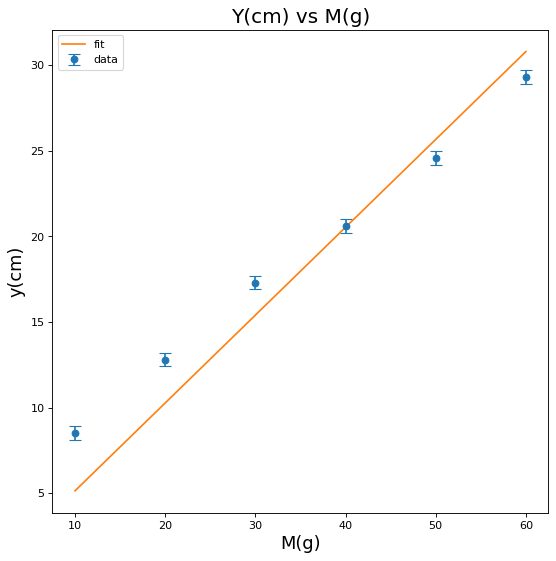

In [8]:
#the function we are fitting, called func
def func(x,a):
     return a*x
    
def func2(x,a,b):
     return a*x + b
    
parameters, perr = plotData(func, "data.txt","Y(cm) vs M(g)", "M(g)", "y(cm)")

In [9]:
# slope = k/g
k = 9.8/(parameters[0]*10)
uncertainty = perr[0]*9.8
print("The spring constant is ", k, "N/m")

The spring constant is  1.908818493154631 N/m


Slope: [0.40771429 4.58000001]
Error [0.00887096 0.34547414]


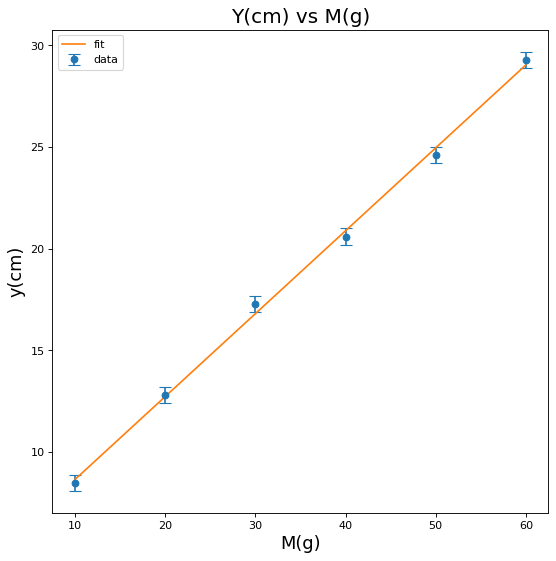

In [11]:
parameters, perr = plotData(func2, "data.txt","Y(cm) vs M(g)", "M(g)", "y(cm)")

In [12]:
# slope = k/g
k = 9.8/(parameters[0]*10)
print("The spring constant is ", k, "N/m")
m = k*parameters[1]/(9.8*100)
print("The effective mass is ", m, "Kg")

The spring constant is  2.4036440102391072 N/m
The effective mass is  0.011233356736283054 Kg
